In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
raw_savings_df = te.getHistoricalData(country='portugal', indicator='Personal savings',initDate='2019-01-01', output_type='df')
raw_spendings_df = te.getHistoricalData(country='portugal', indicator='Personal Spending', initDate='2019-01-01', output_type='df')

In [4]:
savings_df = raw_savings_df[['DateTime', 'Value']].rename(columns={'Value': 'Personal Savings(%)'})

savings_df['Date'] = pd.DatetimeIndex(savings_df['DateTime'])
savings_df.set_index('Date', inplace=True)
del savings_df['DateTime']


spending_df = raw_spendings_df[['DateTime', 'Value']].rename(columns={'Value': 'Personal Spending(%)'})

spending_df['Date'] = pd.DatetimeIndex(spending_df['DateTime'])
spending_df.set_index('Date', inplace=True)
del spending_df['DateTime']


df = pd.merge(spending_df,savings_df, on='Date')

df

,Personal Spending(%),Personal Savings(%)
Date,,
2019-03-31,2.4,6.5
2019-06-30,2.6,6.9
2019-09-30,2.2,7.1
2019-12-31,-0.4,7.1
2020-03-31,-4.8,7.8
2020-06-30,-7.8,10.7
2020-09-30,-7.0,11.0
2020-12-31,-4.5,12.8


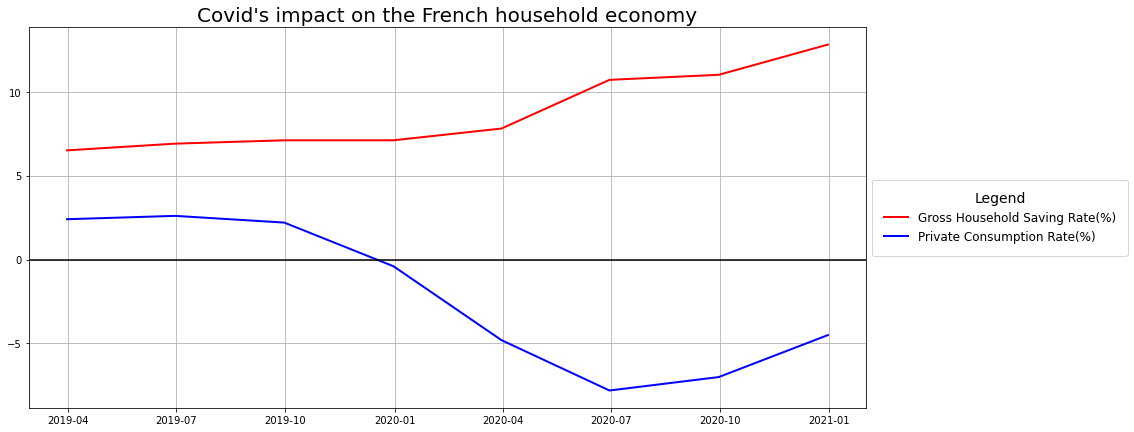

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.plot( df.index.tolist(), df['Personal Savings(%)'].values.tolist(), marker='', color='red', linewidth=2, label="Gross Household Saving Rate(%)")
plt.plot( df.index.tolist(), df['Personal Spending(%)'].values.tolist(),marker='', color='blue', linewidth=2, label="Private Consumption Rate(%)")


plt.legend(
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)


ax.xaxis.grid(True)
ynew = 0
ax.axhline(ynew, color='black')
plt.grid(True)

plt.title("Covid's impact on the French household economy", size=20)
plt.show()
